In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras import regularizers
from sklearn.metrics import roc_curve,auc
import tensorflow as tf

In [5]:
image_dimensions = {'height':256, 'width':256, 'channels':3}


# Original Model

In [7]:
model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', activation = 'relu', input_shape=(image_dimensions['height'], image_dimensions['width'], image_dimensions['channels']))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(8, (5, 5), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = Adam(lr = 0.001), loss = 'mean_squared_error', metrics = ['accuracy'])


C:\Users\new\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
dataGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    subset="training")

test_data = dataGenerator.flow_from_directory(
    './data/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    subset="validation")

# Re-checking class assignment after removing it
train_data.class_indices

Found 5684 images belonging to 2 classes.
Found 1420 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

In [9]:
model_info = model.fit_generator(train_data, steps_per_epoch= 5684//64, validation_data=test_data, validation_steps= 1420//64, epochs=20)

C:\Users\new\AppData\Local\Temp\ipykernel_19168\4034268938.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info = model.fit_generator(train_data, steps_per_epoch= 5684//64, validation_data=test_data, validation_steps= 1420//64, epochs=20)


Epoch 1/20
88/88 [==============================] - 323s 4s/step - loss: 0.1444 - accuracy: 0.8128 - val_loss: 0.5650 - val_accuracy: 0.4020
Epoch 2/20
88/88 [==============================] - 307s 3s/step - loss: 0.0757 - accuracy: 0.8988 - val_loss: 0.5432 - val_accuracy: 0.4006
Epoch 3/20
88/88 [==============================] - 304s 3s/step - loss: 0.0580 - accuracy: 0.9235 - val_loss: 0.2508 - val_accuracy: 0.6499
Epoch 4/20
88/88 [==============================] - 289s 3s/step - loss: 0.0494 - accuracy: 0.9363 - val_loss: 0.1658 - val_accuracy: 0.7486
Epoch 5/20
88/88 [==============================] - 282s 3s/step - loss: 0.0445 - accuracy: 0.9411 - val_loss: 0.1732 - val_accuracy: 0.7486
Epoch 6/20
88/88 [==============================] - 263s 3s/step - loss: 0.0384 - accuracy: 0.9523 - val_loss: 0.1564 - val_accuracy: 0.7962
Epoch 7/20
88/88 [==============================] - 270s 3s/step - loss: 0.0326 - accuracy: 0.9605 - val_loss: 0.0949 - val_accuracy: 0.8807
Epoch 8/20
88

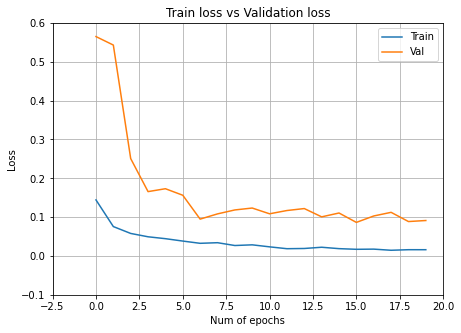

In [10]:
train_loss = model_info.history['loss']
val_loss = model_info.history['val_loss']
train_acc = model_info.history['accuracy']
val_acc = model_info.history['val_accuracy']
XC = range(20)
plt.figure(1, figsize = (7,5))
plt.plot(XC, train_loss)
plt.plot(XC, val_loss)
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('Train loss vs Validation loss')
plt.grid(True)
plt.legend(['Train','Val'])
plt.style.use(['classic'])

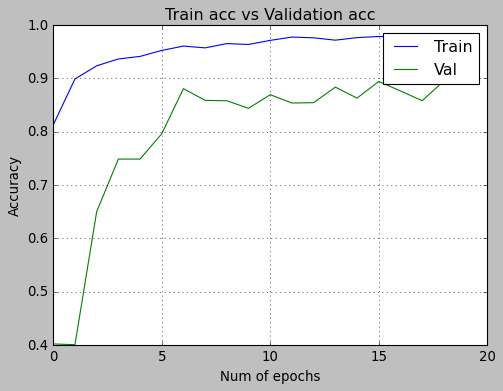

In [11]:
plt.figure(1, figsize = (7,5))
plt.plot(XC, train_acc)
plt.plot(XC, val_acc)
plt.xlabel('Num of epochs')
plt.ylabel('Accuracy')
plt.title('Train acc vs Validation acc')
plt.grid(True)
plt.legend(['Train','Val'])
plt.style.use(['classic'])

In [14]:
acc_train = pd.DataFrame(train_acc)
print(acc_train.mean())

0    0.954048
dtype: float64


In [15]:
acc_val = pd.DataFrame(val_acc)
print(acc_val.mean())

0    0.79652
dtype: float64


In [26]:
loss_val = pd.DataFrame(val_loss)
print(loss_val.mean())

0    0.167034
dtype: float64


In [27]:
loss_train = pd.DataFrame(train_loss)
print(loss_train.mean())

0    0.035872
dtype: float64


# Proposed Model

In [16]:
model1 = Sequential()
model1.add(Conv2D(8, (3, 3), padding='same', activation = 'relu', input_shape=(image_dimensions['height'], image_dimensions['width'], image_dimensions['channels']))) 
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Conv2D(8, (5, 5), padding='same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model1.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(4, 4), padding='same'))

model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(16, kernel_regularizer = regularizers.l2(0.01)))
model1.add(LeakyReLU(alpha=0.1))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation = 'sigmoid', kernel_regularizer = regularizers.l2(0.01)))

model1.compile(optimizer = Adam(lr = 0.001), loss = 'mean_squared_error', metrics = ['accuracy'])

C:\Users\new\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
model_info1 = model1.fit_generator(train_data, steps_per_epoch= 5684//64, validation_data=test_data, validation_steps= 1420//64, epochs=20)

C:\Users\new\AppData\Local\Temp\ipykernel_19168\4211052526.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info1 = model1.fit_generator(train_data, steps_per_epoch= 5684//64, validation_data=test_data, validation_steps= 1420//64, epochs=20)


Epoch 1/20
88/88 [==============================] - 317s 4s/step - loss: 0.4258 - accuracy: 0.7988 - val_loss: 0.4214 - val_accuracy: 0.5675
Epoch 2/20
88/88 [==============================] - 361s 4s/step - loss: 0.2252 - accuracy: 0.9060 - val_loss: 0.3053 - val_accuracy: 0.7514
Epoch 3/20
88/88 [==============================] - 400s 5s/step - loss: 0.1475 - accuracy: 0.9299 - val_loss: 0.2336 - val_accuracy: 0.7635
Epoch 4/20
88/88 [==============================] - 378s 4s/step - loss: 0.1014 - accuracy: 0.9520 - val_loss: 0.1657 - val_accuracy: 0.8530
Epoch 5/20
88/88 [==============================] - 362s 4s/step - loss: 0.0804 - accuracy: 0.9578 - val_loss: 0.1174 - val_accuracy: 0.9055
Epoch 6/20
88/88 [==============================] - 324s 4s/step - loss: 0.0637 - accuracy: 0.9665 - val_loss: 0.1026 - val_accuracy: 0.9062
Epoch 7/20
88/88 [==============================] - 300s 3s/step - loss: 0.0578 - accuracy: 0.9665 - val_loss: 0.1623 - val_accuracy: 0.8026
Epoch 8/20
88

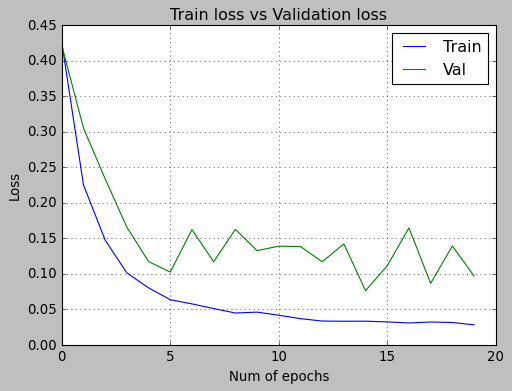

In [18]:
train_loss1 = model_info1.history['loss']
val_loss1 = model_info1.history['val_loss']
train_acc1 = model_info1.history['accuracy']
val_acc1 = model_info1.history['val_accuracy']

plt.figure(1, figsize = (7,5))
plt.plot(XC, train_loss1)
plt.plot(XC, val_loss1)
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('Train loss vs Validation loss')
plt.grid(True)
plt.legend(['Train','Val'])
plt.style.use(['classic'])

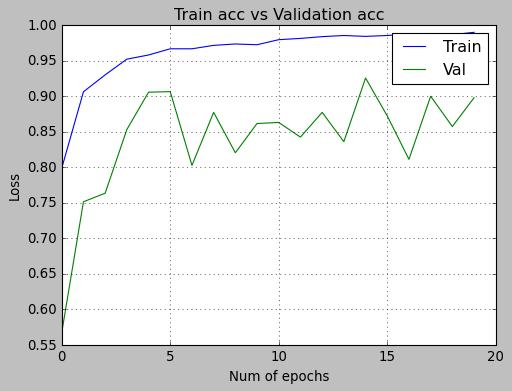

In [19]:
plt.figure(1, figsize = (7,5))
plt.plot(XC, train_acc1)
plt.plot(XC, val_acc1)
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('Train acc vs Validation acc')
plt.grid(True)
plt.legend(['Train','Val'])
plt.style.use(['classic'])

In [28]:
acc_train1 = pd.DataFrame(train_acc1)
print(acc_train1.mean())

0    0.962109
dtype: float64


In [29]:
acc_val1 = pd.DataFrame(val_acc1)
print(acc_val1.mean())

0    0.839524
dtype: float64


In [30]:
loss_train1 = pd.DataFrame(train_loss1)
print(loss_train1.mean())

0    0.078977
dtype: float64


In [31]:
loss_val1 = pd.DataFrame(val_loss1)
print(loss_val1.mean())

0    0.156642
dtype: float64


# Comparison between original model and proposed model

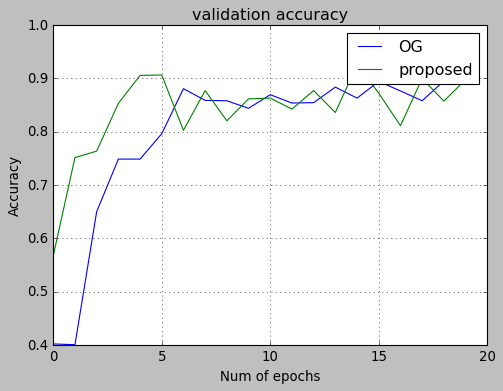

In [35]:
plt.figure(1, figsize = (7,5))
plt.plot(XC, val_acc)
plt.plot(XC, val_acc1)
plt.xlabel('Num of epochs')
plt.ylabel('Accuracy')
plt.title('validation accuracy')
plt.grid(True)
plt.legend(['OG','proposed'])
plt.style.use(['classic'])

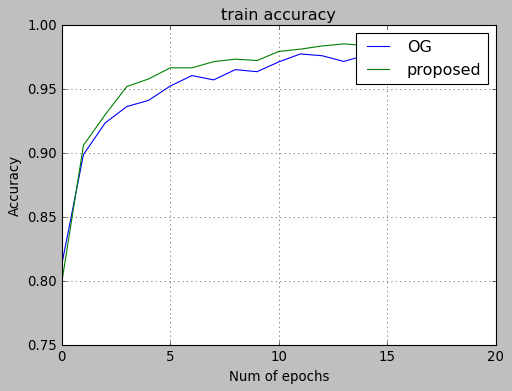

In [34]:
plt.figure(1, figsize = (7,5))
plt.plot(XC, train_acc)
plt.plot(XC, train_acc1)
plt.xlabel('Num of epochs')
plt.ylabel('Accuracy')
plt.title('train accuracy')
plt.grid(True)
plt.legend(['OG','proposed'])
plt.style.use(['classic'])

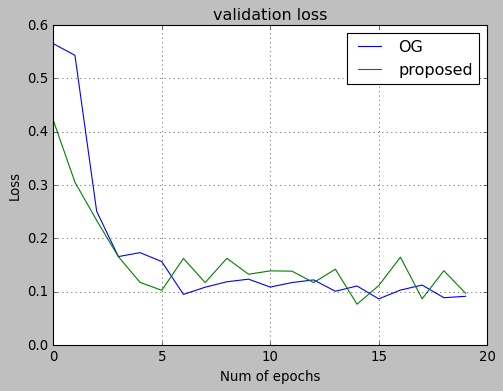

In [36]:
plt.figure(1, figsize = (7,5))
plt.plot(XC, val_loss)
plt.plot(XC, val_loss1)
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('validation loss')
plt.grid(True)
plt.legend(['OG','proposed'])
plt.style.use(['classic'])

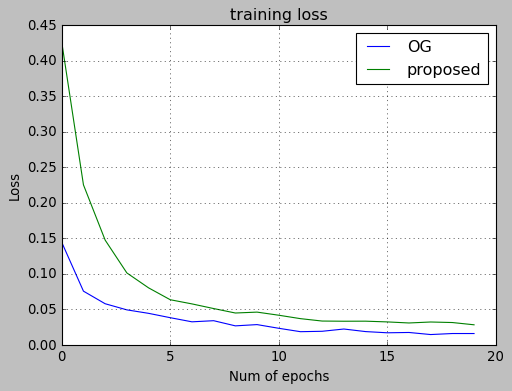

In [37]:
plt.figure(1, figsize = (7,5))
plt.plot(XC, train_loss)
plt.plot(XC, train_loss1)
plt.xlabel('Num of epochs')
plt.ylabel('Loss')
plt.title('training loss')
plt.grid(True)
plt.legend(['OG','proposed'])
plt.style.use(['classic'])

# Saving model weights


In [ ]:
model1.save_weights('Meso4_DF')